# Global Shark Attack Incidents  

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure

### Hipótesis  

¿Son los ataques de tiburones más usuales en hombres que en mujeres?  


In [34]:
# import dataset
df = pd.read_csv("./input/GSAF5.csv")
display(df.head())
display(df.shape)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


(5992, 24)

In [35]:
# Visualizar contenido
print(df.columns)
print(df.describe())
df.dtypes

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
              Year  original order
count  5992.000000     5992.000000
mean   1925.204606     2997.548899
std     286.473712     1729.860210
min       0.000000        2.000000
25%    1942.000000     1499.750000
50%    1975.000000     2997.500000
75%    2003.000000     4495.250000
max    2016.000000     5993.000000


Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

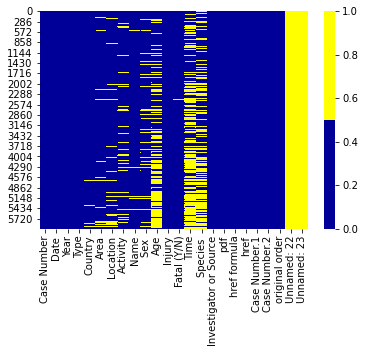

In [36]:
# mapeado de datos nulos
cols = df.columns[:]
colours = ['#000099', '#ffff00'] # amarillo == valores nulos // azul == valores no nulos
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [37]:
# columnas con valores nulos
df2 = [col for col in df.columns if df[col].isnull().sum()[df[col].isnull().sum() >= 0]]
df2 = df[df2]
display(df2.head())

# porcentaje y enumeración de datos nulos por columnas
for col in df2:
    pct_missing = np.mean(df2[col].isnull())
    print(f'{col} - {round(pct_missing*100)}% - {df2[col].isnull().sum()} null(s)')

,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href formula,href,Unnamed: 22,Unnamed: 23
0,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN
1,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN
2,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN
3,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN
4,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN


Country - 1.0% - 43 null(s)
Area - 7.0% - 402 null(s)
Location - 8.0% - 496 null(s)
Activity - 9.0% - 527 null(s)
Name - 3.0% - 200 null(s)
Sex  - 9.0% - 567 null(s)
Age - 45.0% - 2681 null(s)
Injury - 0.0% - 27 null(s)
Fatal (Y/N) - 0.0% - 19 null(s)
Time - 54.0% - 3213 null(s)
Species  - 49.0% - 2934 null(s)
Investigator or Source - 0.0% - 15 null(s)
href formula - 0.0% - 1 null(s)
href - 0.0% - 3 null(s)
Unnamed: 22 - 100.0% - 5991 null(s)
Unnamed: 23 - 100.0% - 5990 null(s)


Las columnas que más valor pueden aportar a la hora de contestar la hipótesis son:  
- Sex  
- Fatal 

Por otro lado, creo que también es interesante la información que pueden aportar las columnas:  
- Age  
- Country  
- Date

In [38]:
# info columna sex
df2['Sex '].unique()

array(['M', nan, 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [39]:
df2.groupby(['Sex ']).size().reset_index(name='counts')

,Sex,counts
0,.,1
1,F,585
2,M,4835
3,M,2
4,N,1
5,lli,1


In [40]:
# limpieza columna sex:
df2['Sex '] = df2['Sex '].str.strip()
df2['Sex'] = df2['Sex '].apply(lambda x: x if x in ('M','F') else '-')
df2.drop(['Sex '], axis=1, inplace=True)
df2['Sex'].unique()

c:\users\heclo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\heclo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\heclo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to 

array(['M', '-', 'F'], dtype=object)

In [41]:
# info columna fatal
df2['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'UNKNOWN', ' N', 'F', 'N ', '#VALUE!', 'n'],
      dtype=object)

In [42]:
df2.groupby(['Fatal (Y/N)']).size().reset_index(name='counts')

,Fatal (Y/N),counts
0,N,8
1,#VALUE!,1
2,F,1
3,N,4315
4,N,1
5,UNKNOWN,94
6,Y,1552
7,n,1


In [43]:
# limpieza columna fatal:
df2['Fatal (Y/N)'] = df2['Fatal (Y/N)'].str.upper().str.strip()
df2['Fatal'] = df2['Fatal (Y/N)'].apply(lambda x: x if x in ('Y','N') else '-')
df2.drop(['Fatal (Y/N)'], axis=1, inplace=True)
df2['Fatal'].unique()

c:\users\heclo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\heclo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\heclo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to 

array(['N', 'Y', '-'], dtype=object)

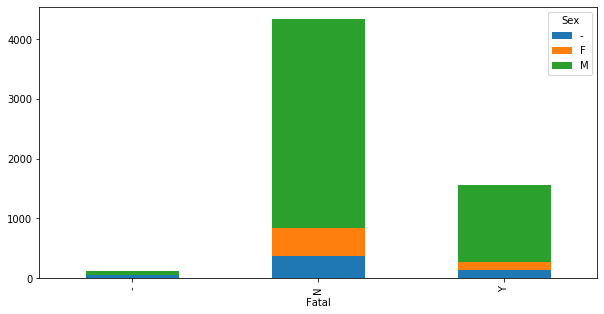

In [12]:
# plot ataque vs sex
df2.groupby(['Fatal','Sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.show()

### Contestando la hipótesis
En este gráfico podemos observar que tanto en ataques que no fueron fatales como en aquellos que sí lo fueron, los hombres tienen un mayor volumen de presencia que las mujeres. 

Por lo tanto, `¿Son los ataques de tiburones más usuales en hombres que en mujeres?`  

No podemos rechazar la hipótesis ya que los datos apuntan a que los ataques fatales de tiburon son más propensos en hombres que en mujeres.

In [13]:
# info columna age
df2.Age.unique()

array(['16', '36', '43', nan, '60s', '51', '50', '12', '9', '22', '25',
       '37', '20', '49', '15', '21', '40', '72', '18', '29', '31', '11',
       '10', '59', '42', '34', '35', '19', '6', '27', '64', '60', '23',
       '52', '13', '57', '48', '39', '24', '26', '69', '46', 'Teen', '41',
       '45', '65', '38', '71', '32', '58', '28', '54', '44', '14', '7',
       '62', '40s', '68', '47', '17', '30', '63', '70', '18 months', '53',
       '20s', '33', '30s', '50s', '8', '61', '55', 'teen', '66', '77',
       '74', '3', '56', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', 'Teens', '36 & 26', '8 or 10', '84',
       '� ', ' ', '30 or 36', '6�', '21 & ?', '75', '33 or 37', 'mid-30s',
       '73', '23 & 20', '7      &    31', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '21 or 26',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35', '23 & 26', '1', '(adult)', '33 & 37', '25 or 2

In [17]:
# limpieza columna age
df2['Age2'] = df2.Age.str.extract('(\d+)')
df2['Age2'] = pd.to_numeric(df2['Age2'],errors='coerce').fillna(0).astype(np.int64)
df2.drop(['Age'], axis=1, inplace=True)
df2['Age2'].unique()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

array([16, 36, 43,  0, 60, 51, 50, 12,  9, 22, 25, 37, 20, 49, 15, 21, 40,
       72, 18, 29, 31, 11, 10, 59, 42, 34, 35, 19,  6, 27, 64, 23, 52, 13,
       57, 48, 39, 24, 26, 69, 46, 41, 45, 65, 38, 71, 32, 58, 28, 54, 44,
       14,  7, 62, 68, 47, 17, 30, 63, 70, 53, 33,  8, 61, 55, 66, 77, 74,
        3, 56,  5, 86, 84, 75, 73, 87, 67,  1,  2, 81, 78])

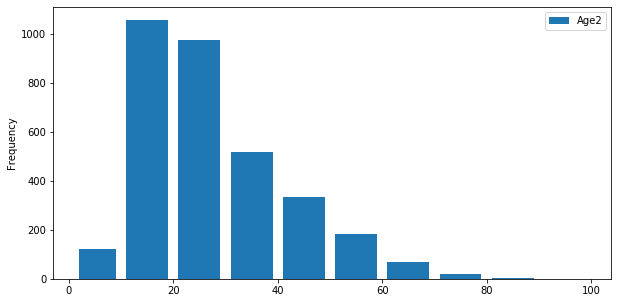

In [18]:
# plot 
df2[['Age2']].plot(kind='hist',bins=[1,10,20,30,40,50,60,70,80,90,100],rwidth=0.8,figsize=(10,5))
plt.show()

Histograma que muestra ataques de tiburón por edad

In [20]:
df_hipotesis = df2[['Sex', 'Fatal']]
df_hipotesis.head()

,Sex,Fatal
0,M,N
1,M,N
2,M,N
3,M,N
4,M,N


### Exportamos a un nuevo csv aquellos datos que nos han ayudado a alcanzar nuestro objetivo

In [22]:
export_csv = pd.DataFrame(df_hipotesis)
export_csv.to_csv(r'./output/hipotesis.csv', index = None, header=True, encoding='latin1')